In [ ]:
!pip install rdkit-pypi
!pip install openpyxl
!pip install rdkit-pypi avalon_framework

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for avalon_framework: filename=avalon_framework-1.8.2-py3-none-any.whl size=3868 sha256=d31daa24489e4f0248afceb7cc5fa037eb30ef70543cf7b1da3fe5e81d2e6c53
  Stored in directory: /root/.cache/pip/wheels/19/a3/86/e8991278ac56c74bdc9382f08c2790b5c3bbcd8ea5c08f9a90
Successfully built avalon_framework


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

# Morgan fingerprint training

In [ ]:
# Upload the Excel file containing SMILES, CLASS and F/F data
uploaded = files.upload()

# Read the uploaded Excel file
df = pd.read_excel(next(iter(uploaded)))

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Generate fingerprints using RDKit's Morgan fingerprint
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
print(class_counts)
print(f"Number of features in Morgan_fingerprints: {len(fingerprints[0])}")

# Save molecule ID and Class to CSV
# Save molecule ID, dFF, and Class to CSV
output_df = df[["Cmpd Lab", "dFF", "Class"]]
output_df.to_csv("molecule_class_output.csv", index=False)

print("Output saved to 'molecule_class_output.csv'")


Saving INPUT-CORRECT-ML-CLASS.xlsx to INPUT-CORRECT-ML-CLASS.xlsx
Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O

Average F1 Score over 200 models: 0.7576
Average Accuracy over 200 models: 0.7904

Best non-perfect F1 Score: 0.9412 (Model Index: 20)
Best non-perfect Accuracy: 0.9231 (Model Index: 10)

ROC Curve Data for Best F1 Score Model (Index 20):
     Model Index  Class    FPR    TPR
234           20      1  0.000  0.000
235           20      1  0.000  0.125
236           20      1  0.000  0.375
237           20      1  0.200  0.375
238           20      1  0.200  1.000
239           20      1  1.000  1.000
240           20      0  0.000  0.000
241           20      0  0.000  0.200
242           20      0  0.000  0.800
243           20      0  0.625  0.800
244           20      0  0.625  1.000
245           20      0  1.000  1.000


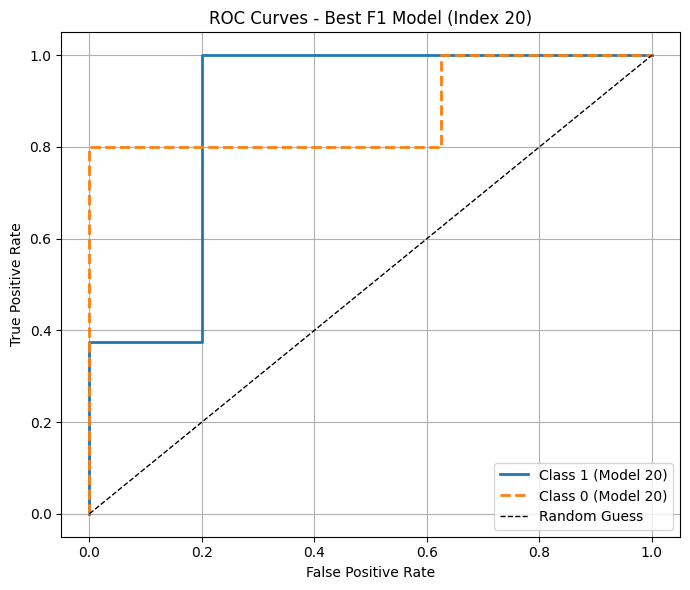

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-Morgan.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

# Separate ROC data for class 1 and class 0
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()

# Add a column to distinguish the class
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"

# Combine both for output
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV for Origin plotting
roc_combined.to_csv("best_model_roc_data_both_classes-Morgan.csv", index=False)

# -----------------------------
# PLOT ROC CURVES FOR BOTH CLASSES
# -----------------------------
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (Model {best_model_index})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (Model {best_model_index})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best F1 Model (Index {best_model_index})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_Morgan.csv", index=False)

#print("Saved class-wise F1 scores for all models to 'f1_scores_per_class_200models.csv'")


# MACCS training

In [ ]:
from rdkit.Chem import MACCSkeys

# Read the uploaded Excel file
df = pd.read_excel("INPUT-CORRECT-ML-CLASS.xlsx")

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
maccs_fingerprints = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
print(class_counts)
print(f"Number of features in Maccs_fingerprints: {len(maccs_fingerprints[0])}")

Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O)=C1O', 'OC1=C(F)C=CC=C1O', 'OC1=CC(O)=CC(O)=C1', 'OC1=C(N)C=CC=C1

Average F1 Score over 200 models: 0.7975
Average Accuracy over 200 models: 0.8173

Best non-perfect F1 Score: 0.9474 (Model Index: 112)
Best non-perfect Accuracy: 0.9231 (Model Index: 7)

ROC Curve Data for Best F1 Score Model (Index 112):
      Model Index  Class       FPR       TPR
1341          112      1  0.000000  0.000000
1342          112      1  0.000000  0.111111
1343          112      1  0.000000  0.777778
1344          112      1  0.000000  1.000000
1345          112      1  1.000000  1.000000
1346          112      0  0.000000  0.000000
1347          112      0  0.000000  0.250000
1348          112      0  0.000000  1.000000
1349          112      0  0.222222  1.000000
1350          112      0  1.000000  1.000000


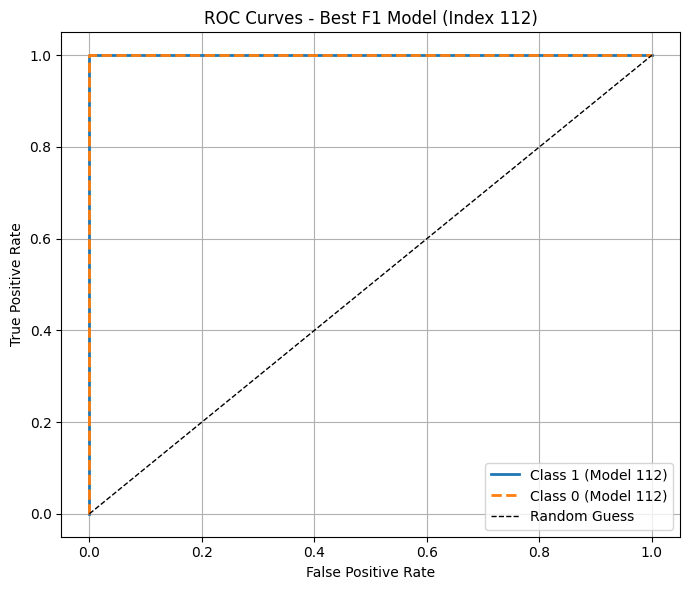

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in maccs_fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-MACCS.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

# Separate ROC data for class 1 and class 0
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()

# Add a column to distinguish the class
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"

# Combine both for output
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV for Origin plotting
roc_combined.to_csv("best_model_roc_data_both_classes-MACCS.csv", index=False)

# -----------------------------
# PLOT ROC CURVES FOR BOTH CLASSES
# -----------------------------
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (Model {best_model_index})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (Model {best_model_index})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best F1 Model (Index {best_model_index})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_MACCS.csv", index=False)


# Daylight training

In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs

# Read the uploaded Excel file
df = pd.read_excel("INPUT-CORRECT-ML-CLASS.xlsx")

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
Daylight_fingerprints = [Chem.RDKFingerprint(mol) for mol in mols]

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
#print(class_counts)
print(f"Number of features in Daylight_fingerprints: {len(Daylight_fingerprints[0])}")

Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O)=C1O', 'OC1=C(F)C=CC=C1O', 'OC1=CC(O)=CC(O)=C1', 'OC1=C(N)C=CC=C1

Average F1 Score over 200 models: 0.7336
Average Accuracy over 200 models: 0.7785

Best non-perfect F1 Score: 0.9412 (Model Index: 42)
Best non-perfect Accuracy: 0.9231 (Model Index: 10)

ROC Curve Data for Best F1 Score Model (Index 42):
     Model Index  Class  FPR       TPR
516           42      1  0.0  0.000000
517           42      1  0.0  0.111111
518           42      1  0.0  1.000000
519           42      1  1.0  1.000000
520           42      0  0.0  0.000000
521           42      0  0.0  0.250000
522           42      0  0.0  1.000000
523           42      0  1.0  1.000000


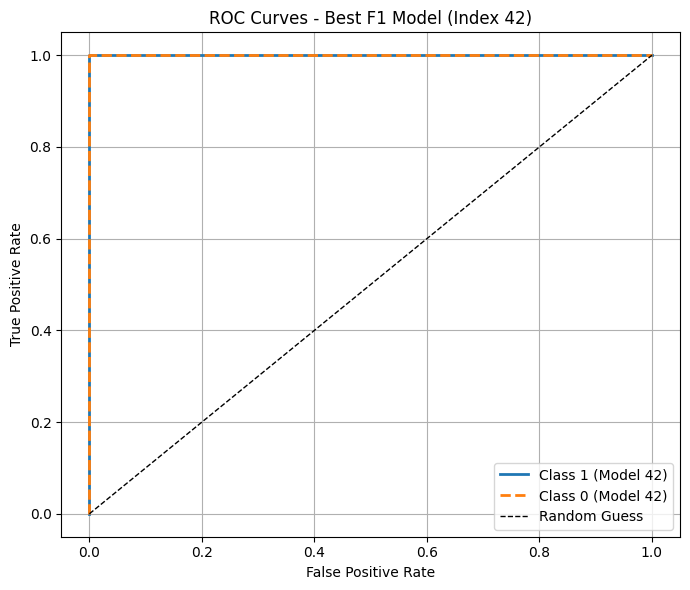

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in Daylight_fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-Daylight.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

# Separate ROC data for class 1 and class 0
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()

# Add a column to distinguish the class
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"

# Combine both for output
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV for Origin plotting
roc_combined.to_csv("best_model_roc_data_both_classes-Daylight.csv", index=False)

# -----------------------------
# PLOT ROC CURVES FOR BOTH CLASSES
# -----------------------------
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (Model {best_model_index})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (Model {best_model_index})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best F1 Model (Index {best_model_index})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_Daylight.csv", index=False)


# AtomPairs training

In [ ]:
from rdkit.Chem import rdMolDescriptors

# Read the uploaded Excel file
df = pd.read_excel("INPUT-CORRECT-ML-CLASS.xlsx")

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
atom_pairs_fingerprints = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol) for mol in mols]

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
print(class_counts)
print(f"Number of features in Atompairs_fingerprints: {len(atom_pairs_fingerprints[0])}")

Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O)=C1O', 'OC1=C(F)C=CC=C1O', 'OC1=CC(O)=CC(O)=C1', 'OC1=C(N)C=CC=C1

Average F1 Score over 200 models: 0.8294
Average Accuracy over 200 models: 0.8462

Best non-perfect F1 Score: 0.9412 (Model Index: 42)
Best non-perfect Accuracy: 0.9231 (Model Index: 3)

ROC Curve Data for Best F1 Score Model (Index 42):
     Model Index  Class  FPR       TPR
474           42      1  0.0  0.000000
475           42      1  0.0  0.111111
476           42      1  0.0  1.000000
477           42      1  1.0  1.000000
478           42      0  0.0  0.000000
479           42      0  0.0  0.250000
480           42      0  0.0  1.000000
481           42      0  1.0  1.000000

Best Model Index (non-perfect AUC): 105
F1 Score: 0.9412, Accuracy: 0.9231
AUC Class 1: 0.8000, AUC Class 0: 0.8000


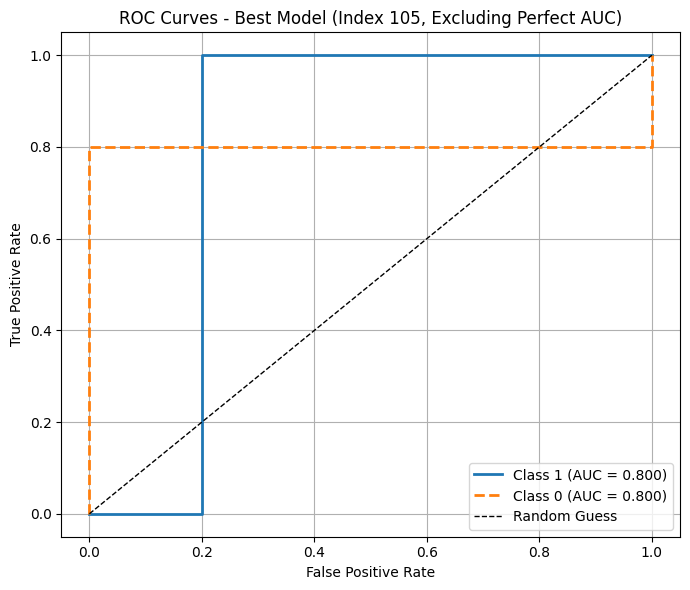

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in atom_pairs_fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-AtomPairs.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
from sklearn.metrics import auc

# --------------------------------------------
# CALCULATE AUC FOR EACH MODEL TO FILTER PERFECT AUCs
# --------------------------------------------
# Group ROC data by model and class
model_auc_info = []

# Loop through unique model indices
for model_id in metrics_df["Model Index"]:
    model_data = roc_df[roc_df["Model Index"] == model_id]

    # Class 1 AUC
    class1_data = model_data[model_data["Class"] == 1]
    if len(class1_data) > 1:  # Ensure there are enough points
        auc1 = auc(class1_data["FPR"], class1_data["TPR"])
    else:
        auc1 = np.nan

    # Class 0 AUC
    class0_data = model_data[model_data["Class"] == 0]
    if len(class0_data) > 1:
        auc0 = auc(class0_data["FPR"], class0_data["TPR"])
    else:
        auc0 = np.nan

    model_auc_info.append({
        "Model Index": model_id,
        "AUC Class 1": auc1,
        "AUC Class 0": auc0
    })

# Convert AUC info to DataFrame and merge with metrics
auc_df = pd.DataFrame(model_auc_info)
combined_metrics = pd.merge(metrics_df, auc_df, on="Model Index")

# Filter out models with perfect AUC (Class 1 AUC < 1.0)
non_perfect_auc = combined_metrics[combined_metrics["AUC Class 1"] < 1.0]

# Find best F1 model from non-perfect AUC set
best_f1_row = non_perfect_auc.loc[non_perfect_auc["F1 Score"].idxmax()]
best_model_index = int(best_f1_row["Model Index"])

print(f"\nBest Model Index (non-perfect AUC): {best_model_index}")
print(f"F1 Score: {best_f1_row['F1 Score']:.4f}, Accuracy: {best_f1_row['Accuracy']:.4f}")
print(f"AUC Class 1: {best_f1_row['AUC Class 1']:.4f}, AUC Class 0: {best_f1_row['AUC Class 0']:.4f}")

# Extract ROC data for that model
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV
roc_combined.to_csv("best_model_roc_data_excluding_perfect_auc.csv", index=False)

# Plot ROC
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (AUC = {best_f1_row['AUC Class 1']:.3f})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (AUC = {best_f1_row['AUC Class 0']:.3f})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best Model (Index {best_model_index}, Excluding Perfect AUC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_AtomPairs.csv", index=False)


# Avalon Training

In [ ]:
from rdkit import Chem
from rdkit.Avalon import pyAvalonTools

# Read the uploaded Excel file
df = pd.read_excel("INPUT-CORRECT-ML-CLASS.xlsx")

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Avalon_fingerprints = [pyAvalonTools.GetAvalonFP(mol) for mol in mols]

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
print(class_counts)
print(f"Number of features in Avalon_fingerprints: {len(Avalon_fingerprints[0])}")

Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O)=C1O', 'OC1=C(F)C=CC=C1O', 'OC1=CC(O)=CC(O)=C1', 'OC1=C(N)C=CC=C1

Average F1 Score over 200 models: 0.7981
Average Accuracy over 200 models: 0.8162

Best non-perfect F1 Score: 0.9412 (Model Index: 76)
Best non-perfect Accuracy: 0.9231 (Model Index: 8)

ROC Curve Data for Best F1 Score Model (Index 76):
     Model Index  Class    FPR    TPR
932           76      1  0.000  0.000
933           76      1  0.000  0.125
934           76      1  0.000  0.875
935           76      1  0.200  0.875
936           76      1  0.200  1.000
937           76      1  1.000  1.000
938           76      0  0.000  0.000
939           76      0  0.000  0.200
940           76      0  0.000  0.800
941           76      0  0.125  0.800
942           76      0  0.125  1.000
943           76      0  1.000  1.000


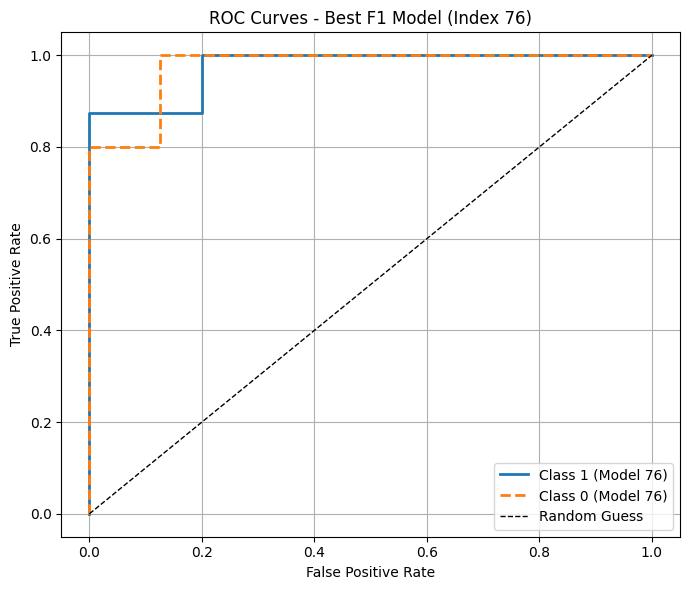

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in Avalon_fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-Avalon.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

# Separate ROC data for class 1 and class 0
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()

# Add a column to distinguish the class
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"

# Combine both for output
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV for Origin plotting
roc_combined.to_csv("best_model_roc_data_both_classes-Avalon.csv", index=False)

# -----------------------------
# PLOT ROC CURVES FOR BOTH CLASSES
# -----------------------------
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (Model {best_model_index})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (Model {best_model_index})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best F1 Model (Index {best_model_index})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_Avalon.csv", index=False)


# Torsion training

In [ ]:
from rdkit.Chem import rdMolDescriptors

# Read the uploaded Excel file
df = pd.read_excel("INPUT-CORRECT-ML-CLASS.xlsx")

# Define column names for better clarity
column_names = ["Cmpd Lab", "Smiles", "dFF", "Class"]

# Rename the DataFrame columns
df.columns = column_names

# Extract columns using descriptive variable names
smiles_column = df['Smiles']
ff_column = df['dFF']

# Convert SMILES column to a list
smiles_list = smiles_column.to_list()

# Convert F/F columns to numeric arrays
ff_values = ff_column.to_numpy().astype(float)

# Create RDKit Mol objects from SMILES
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
torsion_fingerprints = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol) for mol in mols]
len(mols)

# Create 'labels' array based on positive and negative numbers
df["Class"] = (df["dFF"] > 0.3).astype(int)

# Print the length of the molecule and fingerprint lists
print(f"Number of molecules: {len(mols)}")
print(smiles_list)
print(f"Number of fingerprints: {len(fingerprints)}")
print(df["Class"])
#print(labels) #where are labels defined?
class_counts = df["Class"].value_counts()
print(class_counts)
print(f"Number of features in torsion_fingerprints: {len(torsion_fingerprints[0])}")

Number of molecules: 63
['OC1=CC=CC(O)=C1', 'SC1=CC=CC=C1[S-]', 'OC1=CC=NC=C1O', 'OC1=C2C(C=CC=C2O)=CC=C1', '[NH3+]CCC1=CNC2=CC=C(C=C12)O', 'O=C1C([O-])=CC=CC=C1', 'OC1=CC=C(C(C)(C)C)C=C1O', 'O=C(C)NCCC1=CNC2=CC=C(C=C12)OC', '[NH3+]C[C@H](O)C1=CC=C(O)C(O)=C1', 'OC1=CC2=C(C=C1O)NC=C2', 'OC1=CC(Cl)=CC=C1O', '[O-]C([C@H](O)[C@@H](O)C([O-])=O)=O', 'OC1=C(O)C=CC(C([O-])=O)=C1', 'OCC(O)C(O)C(O)C(O)CO', 'OC1=C(O)C=CC(O)=C1', 'O=CC1=C(C=O)C=CC=C1', 'CCC1=CC=C(O)C(O)=C1', ' [NH3+]CCC1=CC=C(O)C(O)=C1', 'COC1=CC=CC=C1OC', 'O=C(C(C(C)(C)C)=CC(C(C)(C)C)=C1)C1=O', 'OC1=C(O)C=CC=C1OC', 'OC1=CC(N)=CC=C1O', 'OC1=C(C=O)C=CC=C1', 'OC1=C(CO)C=CC=C1', 'OC1=CC=CC=C1OC', 'OCC1=C(CO)C=CC=C1', 'OC1=CC([N+]([O-])=O)=CC=C1[O-]', 'CC(C1=CC=C(O)C(O)=C1)=O', 'OC1=C(O)C=CC(C(OC)=O)=C1', 'O=C(CO)C1=CC=CC=C1', 'OC(C([O-])=O)C1=CC=CC=C1', 'OC1=CC(C#N)=CC=C1O', 'OC1=C(O)C=CC(OC)=C1', 'OC1=CC=C(C=O)C=C1O', 'OC1=C(Cl)C=CC=C1O', 'OC1=CC=CN=C1O', 'OC1=CC=CC(O)=C1O', 'OC1=C(F)C=CC=C1O', 'OC1=CC(O)=CC(O)=C1', 'OC1=C(N)C=CC=C1

Average F1 Score over 200 models: 0.8104
Average Accuracy over 200 models: 0.8400

Best non-perfect F1 Score: 0.9474 (Model Index: 71)
Best non-perfect Accuracy: 0.9231 (Model Index: 3)

ROC Curve Data for Best F1 Score Model (Index 71):
     Model Index  Class       FPR       TPR
825           71      1  0.000000  0.000000
826           71      1  0.000000  0.111111
827           71      1  0.250000  0.111111
828           71      1  0.250000  1.000000
829           71      1  1.000000  1.000000
830           71      0  0.000000  0.000000
831           71      0  0.000000  0.250000
832           71      0  0.000000  0.750000
833           71      0  0.888889  0.750000
834           71      0  0.888889  1.000000
835           71      0  1.000000  1.000000


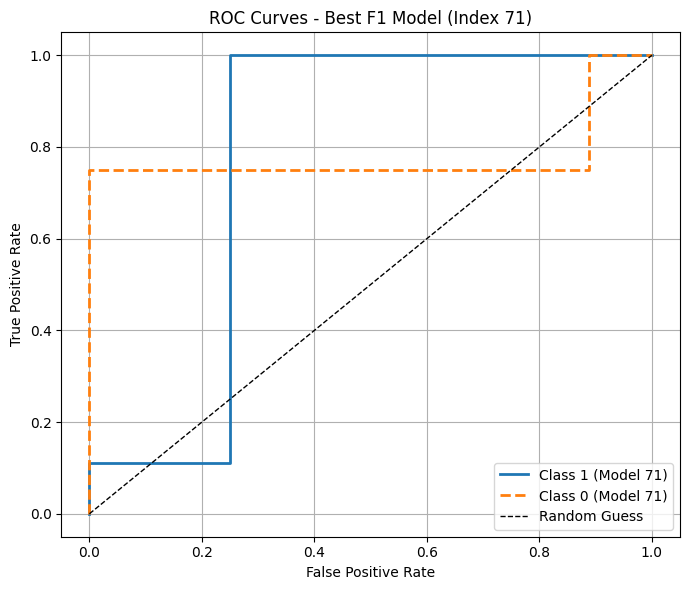

In [ ]:
fingerprints_list = [list(fp.ToBitString()) for fp in torsion_fingerprints]

# Convert to NumPy arrays
features = np.array(fingerprints_list).astype(int)
labels = df["Class"].to_numpy()

# Set a fixed random seed for reproducibility
seed_value = 45
np.random.seed(seed_value)

# -----------------------------
# TRAIN 200 MODELS
# -----------------------------
num_models = 200
metrics_data = []
roc_data = []

for i in range(num_models):
    # Shuffle data
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(shuffled_features, shuffled_labels, test_size=0.20, random_state=i)

    # Train SVC model
    model = SVC(probability=True)
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_data.append({
        "Model Index": i + 1,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall
    })

    # ROC curve for class 1
    fpr1, tpr1, _ = roc_curve(y_test, y_prob, pos_label=1)
    for f, t in zip(fpr1, tpr1):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 1,
            "FPR": f,
            "TPR": t
        })

    # ROC curve for class 0
    y_prob_class0 = 1 - y_prob
    fpr0, tpr0, _ = roc_curve(y_test, y_prob_class0, pos_label=0)
    for f, t in zip(fpr0, tpr0):
        roc_data.append({
            "Model Index": i + 1,
            "Class": 0,
            "FPR": f,
            "TPR": t
        })

# -----------------------------
# SAVE METRICS & ANALYZE
# -----------------------------
# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_data)
roc_df = pd.DataFrame(roc_data)

# Save to CSV files
metrics_df.to_csv("model_metrics_all_200-Torsion.csv", index=False)
#roc_df.to_csv("roc_curve_data_all_models.csv", index=False)

# Print average F1 and accuracy
avg_f1 = metrics_df["F1 Score"].mean()
avg_acc = metrics_df["Accuracy"].mean()
print(f"Average F1 Score over 200 models: {avg_f1:.4f}")
print(f"Average Accuracy over 200 models: {avg_acc:.4f}")

# Filter out perfect scores
non_perfect = metrics_df[(metrics_df["F1 Score"] < 1.0) & (metrics_df["Accuracy"] < 1.0)]

# Find best F1 and Accuracy (non-perfect)
best_f1_row = non_perfect.loc[non_perfect["F1 Score"].idxmax()]
best_acc_row = non_perfect.loc[non_perfect["Accuracy"].idxmax()]

print(f"\nBest non-perfect F1 Score: {best_f1_row['F1 Score']:.4f} (Model Index: {int(best_f1_row['Model Index'])})")
print(f"Best non-perfect Accuracy: {best_acc_row['Accuracy']:.4f} (Model Index: {int(best_acc_row['Model Index'])})")

# -----------------------------
# DISPLAY ROC DATA FOR BEST F1 MODEL
# -----------------------------
best_model_index = int(best_f1_row["Model Index"])
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

print(f"\nROC Curve Data for Best F1 Score Model (Index {best_model_index}):")
print(roc_best_model)


# -----------------------------
# SAVE ROC DATA FOR BEST MODEL TO CSV (BOTH CLASSES)
# -----------------------------
roc_best_model = roc_df[roc_df["Model Index"] == best_model_index]

# Separate ROC data for class 1 and class 0
roc_class1 = roc_best_model[roc_best_model["Class"] == 1][["FPR", "TPR"]].copy()
roc_class0 = roc_best_model[roc_best_model["Class"] == 0][["FPR", "TPR"]].copy()

# Add a column to distinguish the class
roc_class1["Class"] = "Class 1"
roc_class0["Class"] = "Class 0"

# Combine both for output
roc_combined = pd.concat([roc_class1, roc_class0], ignore_index=True)

# Save to CSV for Origin plotting
roc_combined.to_csv("best_model_roc_data_both_classes-Torsion.csv", index=False)

# -----------------------------
# PLOT ROC CURVES FOR BOTH CLASSES
# -----------------------------
plt.figure(figsize=(7, 6))
plt.plot(roc_class1["FPR"], roc_class1["TPR"], label=f"Class 1 (Model {best_model_index})", lw=2)
plt.plot(roc_class0["FPR"], roc_class0["TPR"], label=f"Class 0 (Model {best_model_index})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves - Best F1 Model (Index {best_model_index})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix


# === Settings ===
seed_value = 45
np.random.seed(seed_value)
num_models = 200
f1_classwise_data = []

# === Model loop ===
for i in range(num_models):
    # Shuffle and split
    permutation = np.random.permutation(len(features))
    shuffled_features = features[permutation]
    shuffled_labels = labels[permutation]

    x_train, x_test, y_train, y_test = train_test_split(
        shuffled_features, shuffled_labels, test_size=0.20, random_state=i
    )

    model = SVC(probability=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Compute class-wise F1 scores
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    f1_classwise_data.append({
        "Model Index": i + 1,
        "F1 Score Class 0": f1_class_0,
        "F1 Score Class 1": f1_class_1
    })

# === Save to CSV ===
f1_df = pd.DataFrame(f1_classwise_data)
f1_df.to_csv("f1_scores_per_class_200models_Torsion.csv", index=False)
